In [1]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

df = pd.read_csv('NSE-TATAGLOBAL11.csv')

print(df.head())



         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  


0       2018-10-08
1       2018-10-05
2       2018-10-04
3       2018-10-03
4       2018-10-01
           ...    
1230    2013-10-14
1231    2013-10-11
1232    2013-10-10
1233    2013-10-09
1234    2013-10-08
Name: Date, Length: 1235, dtype: object
DatetimeIndex(['2018-10-08', '2018-10-05', '2018-10-04', '2018-10-03',
               '2018-10-01', '2018-09-28', '2018-09-27', '2018-09-26',
               '2018-09-25', '2018-09-24',
               ...
               '2013-10-22', '2013-10-21', '2013-10-18', '2013-10-17',
               '2013-10-15', '2013-10-14', '2013-10-11', '2013-10-10',
               '2013-10-09', '2013-10-08'],
              dtype='datetime64[ns]', name='Date', length=1235, freq=None)


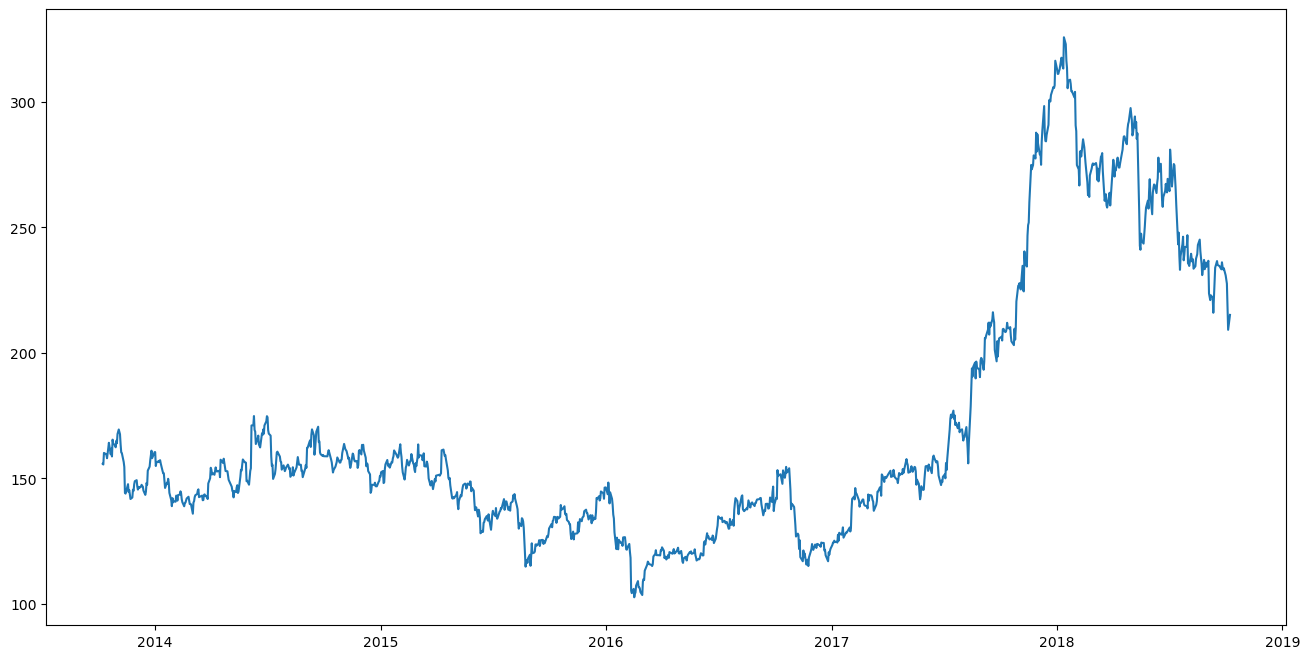

In [16]:
# setting index as date
print(df['Date'])
# this line is converting the string format of Date column into a date-time format
df['Date'] = pd.to_datetime(df.Date, format = '%Y-%m-%d')
df.index = df['Date']
print(df.index)

#plot, checking for 'close' column
# if you don't define the x-axis then plot function automatically take x-axis as the index of the data frame
plt.figure(figsize = (16,8))
plt.plot(df['Close'], label = 'Close price history')




Shape of the data:
(1235, 8)

 Shape of the training set:
(987, 2)

 Shape of the validation set:
(248, 2)

 RMSE value on validation set:
104.51415465984348


C:\Users\HP\AppData\Local\Temp\ipykernel_5532\1560611496.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_5532\1560611496.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


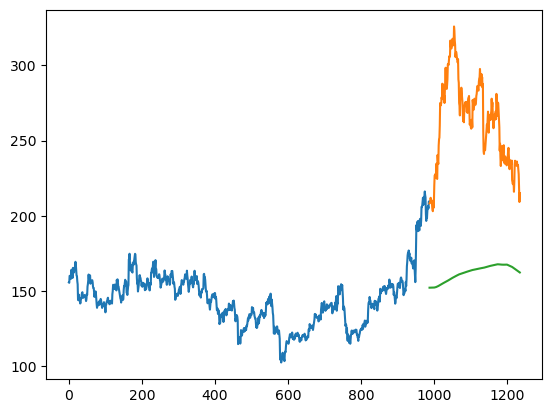

In [28]:
print('\nShape of the data:')
print(df.shape)

# Creating the dataframe with date and the target variable(close)
data = df.sort_index()
new_data = pd.DataFrame(index = range(0,len(df)), columns = ['Date','Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
# Splitting the data
train = new_data[: 987]
valid = new_data[987:]

# shapes of the training set
print('\n Shape of the training set:')
print(train.shape)

# shapes of the validation set
print('\n Shape of the validation set:')
print(valid.shape)

# Making the predictions
preds = []
for i in range(0, valid.shape[0]):
    a = sum(train['Close'][len(train)-248+i:]) + sum(preds)
    # giving the mean
    b = a/248
    preds.append(b)

# Checking the RMSE with valid(test) dataset
rms = np.sqrt(np.mean(np.power(np.array(valid['Close']-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

# To understand the varaition more clearly we are plotting the predicted values with actual values
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
# We used it together like this to get the plots of both of the columns on the same axes
plt.plot(valid[['Close','Predictions']])












In [29]:
# As we can see from the graph that the RMSE is close to 105, and thepredicted values are also in the range of train data. SO to improve we will use Linear regression and kNN

(927, 60, 1) (927, 1)
927/927 - 21s - loss: 0.0027 - 21s/epoch - 23ms/step
8/8 [==============================] - 1s 14ms/step
9.602826151626966


C:\Users\HP\AppData\Local\Temp\ipykernel_17248\873239853.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


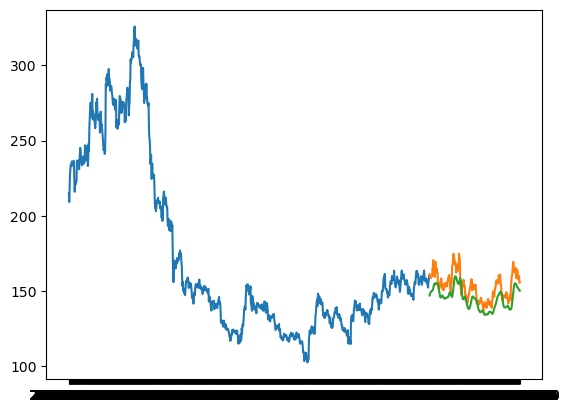

In [26]:
# Using the LSTM
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Creating Data frame
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
data = df.sort_index()
new_data = pd.DataFrame(index = range(0,len(df)), columns = ['Date','Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    
# Setting the index
new_data.index = new_data.Date
new_data.drop('Date', axis =1, inplace =True)

# Creating train and test sets
dataset = new_data.values

train = dataset[0:987]
valid = dataset[987:]

# Converting Dataset into x_train and y_train adn Normalising the data
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [],[]

for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i])
    y_train.append(scaled_data[i])
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape,y_train.shape)

#x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
#print(x_train.shape,y_train.shape)

# Creating and Fitting the LSTM Network
model = Sequential()
# return sequences = true means it will return the complete sequence, not the only last value
model.add(LSTM(units=50, return_sequences = True, input_shape = (x_train.shape[1],1)))
# We are using two LSTMs in which first one will return the whole sequences for each time input and the second one will return the final output value after processing the above returned sequence
model.add(LSTM(units=50))
# here 1 describes the no of dimensions of the output value
model.add(Dense(1))
# This compile method is configuring the model for training, says we will use metric of MSE for error calculations and updating of weights will be done by Adam optimizer
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
# this .fit() method fits the training data into the compiled model. epoch = number of iterations on the training dataset
# batch_size is the number of samples that will be used in updating teh model weights each time
# verbose = amount of info printed during training
model.fit(x_train, y_train, epochs =1, batch_size =1, verbose =2)

# predicting 246 values using the past 60 from the train data
inputs = new_data[(len(new_data) - len(valid) -60):].values
inputs.reshape(-1,1)
#print(inputs)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
X_test = np.array(X_test)

X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1], 1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print(rms)

#for plotting
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


